# **IMPORTING LIBRARIES**

In [182]:
import numpy as np
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from PIL import Image 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import glob
import time 



# seed 
tf.random.set_seed(42)
np.random.seed(42)

In [183]:
# dataset
train_dataset = r'C:\Users\Shiko\d.s_tools_project\Dataset\Train'

DATA PREPROCESSING**

# TRAINING DATASET 

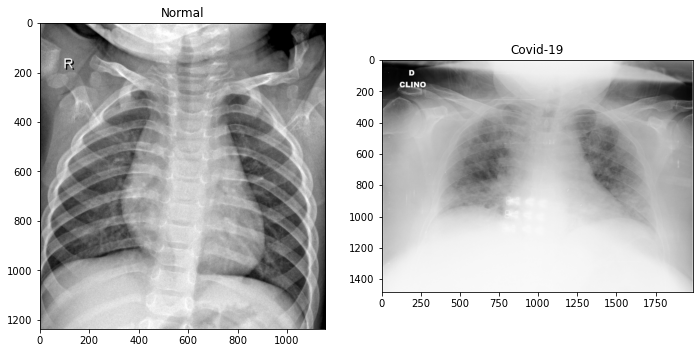

In [184]:
# spliting images 
normal_images = []
for img_path in glob.glob(r"C:\Users\Shiko\d.s_tools_project\Dataset\Train\Normal\IM-0140-0001.jpeg"):
  normal_images.append(mpimg.imread(img_path))



plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.title('Normal')
plt.imshow(normal_images[0], cmap='gray')




covid_images = []

for img_path in glob.glob(r"C:\Users\Shiko\d.s_tools_project\Dataset\Train\Covid\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg"):
  covid_images.append(mpimg.imread(img_path))

plt.subplot(1,2,2)
plt.title('Covid-19')
plt.imshow(covid_images[0], cmap='gray')
plt.tight_layout()

In [185]:
# size of class images  
print('Normal: ', len(r"C:\Users\Shiko\d.s_tools_project\Dataset\Train\Normal"))
print('Covid: ', len(r"C:\Users\Shiko\d.s_tools_project\Dataset\Train\Covid"))

Normal:  53
Covid:  52


In [186]:
# define shape 
image_height = 150
image_width = 150
channels = 3 


# parameters 
input_shape = (image_height, image_width, channels)
number_classe = 2 
batch_size = 6
epochs = 40
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# VALIDATION SET

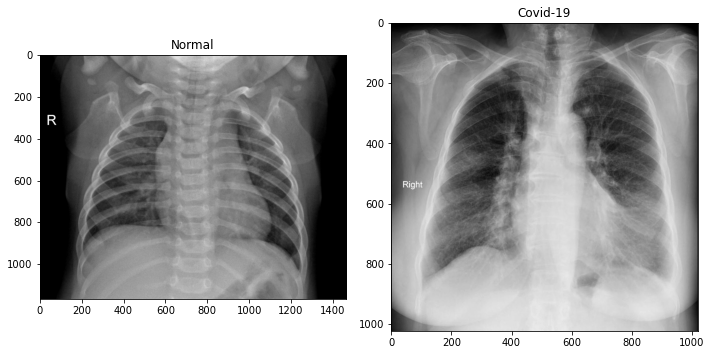

In [187]:
val_dataset =  r"C:\Users\Shiko\d.s_tools_project\Dataset\Val"
# spliting images 
normal_images = []
for img_path in glob.glob(r"C:\Users\Shiko\d.s_tools_project\Dataset\Val\Normal\NORMAL2-IM-0395-0001.jpeg"):
  normal_images.append(mpimg.imread(img_path))



plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.title('Normal')
plt.imshow(normal_images[0], cmap='gray')




covid_images = []

for img_path in glob.glob(r"C:\Users\Shiko\d.s_tools_project\Dataset\Val\Covid\4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg"):
  covid_images.append(mpimg.imread(img_path))

plt.subplot(1,2,2)
plt.title('Covid-19')
plt.imshow(covid_images[0], cmap='gray')
plt.tight_layout()

In [188]:
# size of class images  
print('Normal: ', len(r"C:\Users\Shiko\d.s_tools_project\Dataset\Val\Normal"))
print('Covid: ', len(r"C:\Users\Shiko\d.s_tools_project\Dataset\Val\Covid"))

Normal:  51
Covid:  50


# BUILDING THE CNN

In [170]:
# Convolutional Neural Network 

model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=input_shape),
                                    tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.LayerNormalization(axis=-1),
                                    tf.keras.layers.Conv2D(64, (3,3), (1,1), padding='same', activation='relu'),                                   
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.SpatialDropout2D(0.20),
                                    tf.keras.layers.Conv2D(128, (3,3), (1,1), padding='same', activation='relu'),                                   
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.LayerNormalization(axis=-1),
                                    tf.keras.layers.Conv2D(256, (3,3), (1,1), padding='same', activation='relu'),                                   
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.SpatialDropout2D(0.20),                                  
                                    tf.keras.layers.Conv2D(512, (3,3), (1,1), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.LayerNormalization(axis=-1),
                                    tf.keras.layers.GlobalMaxPool2D(),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=1, activation='sigmoid')
                                    ])


model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [171]:
# Data Augmentation 
data_generator = ImageDataGenerator(featurewise_center=False,
                                    featurewise_std_normalization=False,
                                    rotation_range=10,
                                    zoom_range=0.10,
                                    rescale = 1./255,
                                   validation_split=0.30)
                                  
                                   

# Train 
train_generator = data_generator.flow_from_directory(train_dataset,
                                                     target_size=(image_height, image_width),
                                                     batch_size=batch_size,
                                                   class_mode='binary')

# Validation 
validation_generator = data_generator.flow_from_directory(val_dataset,
                                                     target_size=(image_height, image_width),
                                                     batch_size=batch_size,
                                                     class_mode='binary')
                                               


Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [172]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs)

Epoch 1/40
48/48 [==============================] - 40s 773ms/step - loss: 0.9083 - accuracy: 0.5278 - val_loss: 0.5146 - val_accuracy: 0.8000
Epoch 2/40
48/48 [==============================] - 40s 835ms/step - loss: 0.5217 - accuracy: 0.7812 - val_loss: 0.3988 - val_accuracy: 0.8500
Epoch 3/40
48/48 [==============================] - 41s 857ms/step - loss: 0.3556 - accuracy: 0.8819 - val_loss: 0.5049 - val_accuracy: 0.8333
Epoch 4/40
48/48 [==============================] - 40s 835ms/step - loss: 0.2934 - accuracy: 0.8924 - val_loss: 0.2420 - val_accuracy: 0.9167
Epoch 5/40
48/48 [==============================] - 41s 849ms/step - loss: 0.3256 - accuracy: 0.8819 - val_loss: 0.2392 - val_accuracy: 0.9167
Epoch 6/40
48/48 [==============================] - 40s 832ms/step - loss: 0.2970 - accuracy: 0.8924 - val_loss: 0.2076 - val_accuracy: 0.9333
Epoch 7/40
48/48 [==============================] - 41s 849ms/step - loss: 0.2540 - accuracy: 0.8924 - val_loss: 0.2380 - val_accuracy: 0.8833

In [113]:
print("Accuracy Test -  ", model.evaluate(validation_generator)[1]*100, '%')

10/10 [==============================] - 6s 594ms/step - loss: 0.1747 - accuracy: 0.9500
Accuracy Test -   94.9999988079071 %


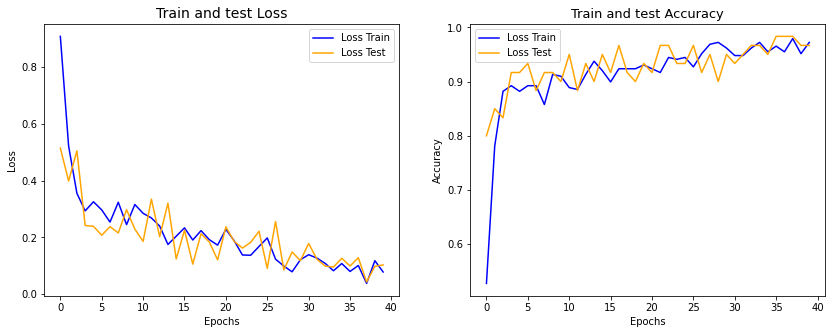

In [174]:
epochs = [i for i in range(40)]
loss_train = history.history['loss']
acc_train = history.history['accuracy']
loss_test = history.history['val_loss']
acc_test = history.history['val_accuracy']


fig, ax = plt.subplots(1,2, figsize=(14,5))

ax[0].plot(epochs, loss_train, color='blue', label='Loss Train')
ax[0].plot(epochs, loss_test, color='orange', label='Loss Test')
ax[0].set_title('Train and test Loss', fontsize=14)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()



ax[1].plot(epochs, acc_train, color='blue', label='Loss Train')
ax[1].plot(epochs, acc_test, color='orange',  label='Loss Test')
ax[1].set_title('Train and test Accuracy', fontsize=13)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

In [175]:
# true class
y_test = validation_generator.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [176]:
y_pred = model.predict(validation_generator)
y_pred = np.around(y_pred, decimals=0)
y_pred

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

# MAKING A SINGLE PREDICTION

In [177]:
#normal>>>1
#covide>>>0

In [178]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Shiko\d.s_tools_project\Dataset\Val\Normal\NORMAL2-IM-0869-0001.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image).round()
if result[0][0] == 1:
  prediction = 'normal'
else:
  prediction = 'covid risk'

In [179]:
print(prediction)

normal


In [180]:
test_image = image.load_img(r'C:\Users\Shiko\d.s_tools_project\Dataset\Val\Covid\4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image).round()
if result[0][0] == 1.:
  prediction = 'normal'
else:
  prediction = 'covid risk'

In [181]:
print(prediction)

covid risk
